In [312]:
#### Dictionary
import numpy as np
people = {
    "first":["Lee","Gi",np.nan,"wpm","None"],
    "full":["34","342","32342","133",'3242'],
    "last":["Alex",np.nan,"Adam",None,"Ab"],
    "email":["AlexLee@gmail.com","np.343nan","GiAdam@gmail.com","No34ne","wpmAb@gmail.com"]
}

In [276]:
import pandas as pd

In [313]:
df = pd.DataFrame(people)

## Indexing 

In [4]:
df.loc[0:2,'last']

0    Alex
1    Adam
2      Ab
Name: last, dtype: object

In [5]:
# Index: 0,1,2 ... n
df

,first,last,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [12]:
df['email'] # returns all the email columns

0    AlexLee@gmail.com
1     GiAdam@gmail.com
2      wpmAb@gmail.com
Name: email, dtype: object

In [16]:
df.set_index('email', inplace=True) # inplace ture sets df = df.set_index

In [8]:
df

,first,last
email,,
AlexLee@gmail.com,Lee,Alex
GiAdam@gmail.com,Gi,Adam
wpmAb@gmail.com,wpm,Ab


In [9]:
df.index

Index(['AlexLee@gmail.com', 'GiAdam@gmail.com', 'wpmAb@gmail.com'], dtype='object', name='email')

In [19]:
df.loc['AlexLee@gmail.com'] # since the index is email, its now different

first     Lee
last     Alex
Name: AlexLee@gmail.com, dtype: object

In [22]:
df.reset_index(inplace=True) # Reset Index
df

,email,first,last
0,AlexLee@gmail.com,Lee,Alex
1,GiAdam@gmail.com,Gi,Adam
2,wpmAb@gmail.com,wpm,Ab


## Filtering the data

In [28]:
filt = (df['first'] == 'Lee')

In [42]:
filt = (df['first'] == 'Lee') & (df['last'] == 'Alex') # and operator

In [43]:
filt = (df['first'] == 'Lee') | (df['last'] == 'Adam') # and operator

In [48]:
df.loc[filt] 

,email,first,last
0,AlexLee@gmail.com,Lee,Alex
1,GiAdam@gmail.com,Gi,Adam


In [51]:
df.loc[filt , 'email'] # same as one above, second param is displayed based on the first filter

0    AlexLee@gmail.com
1     GiAdam@gmail.com
Name: email, dtype: object

In [54]:
df.loc[-filt , 'email'] # displays that did not match filt

2    wpmAb@gmail.com
Name: email, dtype: object

## Alter existing rows, cols, and modify them.

In [60]:
df

,first,last,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [62]:
df.columns

Index(['first', 'last', 'email'], dtype='object')

In [67]:
## modify column names
df.columns = ['first_name', 'last_name','email']

In [70]:
df

,first_name,last_name,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [73]:
#list comprehension -> upper the col names
df.columns = [x.upper() for x in df.columns]
df

,FIRST_NAME,LAST_NAME,EMAIL
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [77]:
# To replace something in in columns
df.columns = df.columns.str.replace(' ','_')
df

,FIRST_NAME,LAST_NAME,EMAIL
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [ ]:
df.columns = [x.lower() for x in df.columns]

In [87]:
df.rename(columns={'first_name': 'first', 'last_name': 'last'}, inplace=True)


In [98]:
# Updating data in rows
df.loc[2] = ['John', 'Smith','JohnSmith@email.com'] # three elements

In [102]:
df.loc[2, ['last','email']] = ['Doe', 'JohnDoe@gmail.com'] # two elements

In [94]:
df.loc[2, 'last'] = 'Smith' # individual element

In [103]:
df.at[2,'last'] = 'Doe' # at works same as loc, preferably use loc
df

,first,last,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [120]:
filt = (df['email'] == 'JohnDoe@gmail.com')
df[filt]['last'] = 'smith'

/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/365466810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[filt]['last'] = 'smith'


In [122]:
df.loc[filt,'last'] = 'Smith' # after filtering, sets the value.

In [126]:
df['email'].str.upper() # does not replace the df, but display the emails only

0    ALEXLEE@GMAIL.COM
1     GIADAM@GMAIL.COM
2    JOHNDOE@GMAIL.COM
Name: email, dtype: object

In [135]:
df['email'] = df['email'].str.lower() # Equiv inplace = true
df

,first,last,email
0,Lee,Alex,alexlee@gmail.com
1,Gi,Adam,giadam@gmail.com
2,John,Smith,johndoe@gmail.com


#### apply, map, applymap, replace

In [132]:
# How apply works in series: Can update value
df['email'].apply(len) # displays the length of email

0    17
1    16
2    17
Name: email, dtype: int64

In [141]:
def update_email(email):
    return email.upper()
df['email'].apply(update_email) # Not required to enter parameter
# Does not assign to df 

df['email'] = df['email'].apply(update_email) # assigns the value

In [143]:
df['email'] = df['email'].apply(lambda x : x.lower()) # lambda to lower case the emails

In [148]:
df.apply(len) # number of columns
len(df['email']) # same thing as above

3

In [150]:
df.apply(len, axis='columns') # reads number of columns each row

0    3
1    3
2    3
dtype: int64

In [153]:
df.apply(pd.Series.min) # minimun in each columns, different rows

first                   Gi
last                  Adam
email    alexlee@gmail.com
dtype: object

In [156]:
df.apply(lambda x: x.min()) # same thing as above

first                   Gi
last                  Adam
email    alexlee@gmail.com
dtype: object

In [163]:
### applymap: only works on datagrame
df.applymap(len) # Works on each individual value
df.applymap(len)['email'].max() # shows email column only, and max()

17

In [168]:
df.applymap(str.lower) # does not assign to df

,first,last,email
0,lee,alex,alexlee@gmail.com
1,gi,adam,giadam@gmail.com
2,john,smith,johndoe@gmail.com


In [176]:
#### map: works on only series, no inplace = True
df['first'].map({'Lee':'Chris', 'John': 'Mary'})

0    NaN
1    NaN
2    NaN
Name: first, dtype: object

In [179]:
#### replace: 
df['first'] = df['first'].replace({'Lee':'Chris', 'John': 'Mary'})

In [182]:
df['full_name'] = df['first'] + ' ' + df['last']
df

,first,last,email,full_name
0,Chris,Alex,alexlee@gmail.com,Chris Alex
1,Gi,Adam,giadam@gmail.com,Gi Adam
2,Mary,Smith,johndoe@gmail.com,Mary Smith


In [187]:
df.drop(columns=['first','last'], inplace=True) # inplace=True will drop those columns
df

KeyError: "['first', 'last'] not found in axis"

In [190]:
df['full_name'].str.split(' ', expand= True) # expand make it to columns

,0,1
0,Chris,Alex
1,Gi,Adam
2,Mary,Smith


In [195]:
df[['first','last']] = df['full_name'].str.split(' ', expand= True) 


In [200]:
df.append({'first': 'Tony'}, ignore_index=True) # ignore_index neglect the other columns

/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/747032636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'first': 'Tony'}, ignore_index=True) # ignore_index neglect the other columns


,email,full_name,first,last
0,alexlee@gmail.com,Chris Alex,Chris,Alex
1,giadam@gmail.com,Gi Adam,Gi,Adam
2,johndoe@gmail.com,Mary Smith,Mary,Smith
3,NaN,NaN,Tony,NaN


In [213]:
people2 = {
    "first":["Leae","Gi","wpm"],
    "last":["Aleax","Adam","Ab"],
    "email":["AlaexLee@gmail.com","GiAdam@gmail.com","wpmAb@gmail.com"]
}

df2 = pd.DataFrame(people2)

In [214]:
df2

,first,last,email
0,Leae,Aleax,AlaexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [215]:
df.append(df2, ignore_index = True, sort=False) # warning because the order of columns did not match

/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/1296452806.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(df2, ignore_index = True, sort=False) # warning because the order of columns did not match


,email,full_name,first,last
0,alexlee@gmail.com,Chris Alex,Chris,Alex
1,giadam@gmail.com,Gi Adam,Gi,Adam
2,johndoe@gmail.com,Mary Smith,Mary,Smith
3,AlaexLee@gmail.com,NaN,Leae,Aleax
4,GiAdam@gmail.com,NaN,Gi,Adam
5,wpmAb@gmail.com,NaN,wpm,Ab
6,AlaexLee@gmail.com,NaN,Leae,Aleax
7,GiAdam@gmail.com,NaN,Gi,Adam
8,wpmAb@gmail.com,NaN,wpm,Ab


In [217]:
df = df.append(df2, ignore_index = True, sort=False)

/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/3053402454.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True, sort=False)


In [219]:
#### removing data
df.drop(index=4)

,email,full_name,first,last
0,alexlee@gmail.com,Chris Alex,Chris,Alex
1,giadam@gmail.com,Gi Adam,Gi,Adam
2,johndoe@gmail.com,Mary Smith,Mary,Smith
3,AlaexLee@gmail.com,NaN,Leae,Aleax
5,wpmAb@gmail.com,NaN,wpm,Ab
6,AlaexLee@gmail.com,NaN,Leae,Aleax
7,GiAdam@gmail.com,NaN,Gi,Adam
8,wpmAb@gmail.com,NaN,wpm,Ab
9,AlaexLee@gmail.com,NaN,Leae,Aleax
10,GiAdam@gmail.com,NaN,Gi,Adam


In [222]:
filt_drop = df['last'] == 'Ab'
df.drop(index=df[filt_drop].index)

,email,full_name,first,last
0,alexlee@gmail.com,Chris Alex,Chris,Alex
1,giadam@gmail.com,Gi Adam,Gi,Adam
2,johndoe@gmail.com,Mary Smith,Mary,Smith
3,AlaexLee@gmail.com,NaN,Leae,Aleax
4,GiAdam@gmail.com,NaN,Gi,Adam
6,AlaexLee@gmail.com,NaN,Leae,Aleax
7,GiAdam@gmail.com,NaN,Gi,Adam
9,AlaexLee@gmail.com,NaN,Leae,Aleax
10,GiAdam@gmail.com,NaN,Gi,Adam


In [223]:
# Sorting

In [232]:
df.sort_values(by='last', ascending = False)

,first,last,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [238]:
df.sort_values(by=['last', 'first'], ascending = [True,True], inplace = True) # Sort ascending respectivly

In [242]:
df.sort_index() # sorting the index

,first,last,email
0,Lee,Alex,AlexLee@gmail.com
1,Gi,Adam,GiAdam@gmail.com
2,wpm,Ab,wpmAb@gmail.com


In [245]:
df['last'].sort_values()

2      Ab
1    Adam
0    Alex
Name: last, dtype: object

# Grouping & Aggregating 

#### Combing multiple data to get results
Mean Mode Median

# Cleaning Data

In [289]:
df

,first,full,last,email
0,Lee,Lee,Alex,AlexLee@gmail.com
1,Gi,Gi,NaN,np.343nan
2,NaN,32342,Adam,GiAdam@gmail.com
3,wpm,wpm,None,No34ne
4,None,3242,Ab,wpmAb@gmail.com


In [290]:
df.dropna()

,first,full,last,email
0,Lee,Lee,Alex,AlexLee@gmail.com
4,None,3242,Ab,wpmAb@gmail.com


In [297]:
df.dropna(axis='index',how='all',subset=['first','last']) 
# subset = drop row specific col only
# axis = either index, columns; if set col, drop cols
# how = drop 'any' values; any or all


# df.dropna(axis='index',how='all',subset=['first','last']) 
# only drop when first and last both are NaN or None

,first,full,last,email
0,Lee,Lee,Alex,AlexLee@gmail.com
1,Gi,Gi,NaN,np.343nan
2,NaN,32342,Adam,GiAdam@gmail.com
3,wpm,wpm,None,No34ne
4,None,3242,Ab,wpmAb@gmail.com


In [301]:
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)
df

,first,full,last,email
0,Lee,Lee,Alex,AlexLee@gmail.com
1,Gi,Gi,NaN,np.343nan
2,NaN,32342,Adam,GiAdam@gmail.com
3,wpm,wpm,None,No34ne
4,None,3242,Ab,wpmAb@gmail.com


In [303]:
df.isna() # not a value

,first,full,last,email
0,False,False,False,False
1,False,False,True,False
2,True,False,False,False
3,False,False,True,False
4,False,False,False,False


In [315]:
df.fillna('MISSING') # missing value replaced with MISSING

,first,full,last,email
0,Lee,34,Alex,AlexLee@gmail.com
1,Gi,342,MISSING,np.343nan
2,MISSING,32342,Adam,GiAdam@gmail.com
3,wpm,133,MISSING,No34ne
4,None,3242,Ab,wpmAb@gmail.com


In [314]:
df.dtypes

first    object
full     object
last     object
email    object
dtype: object

In [322]:
df['full'] = df['full'].astype(float) # np.nan is float, hence convert to float rather int

In [324]:
df['full'].mean()

7218.6

# DateTime Functionality, plot

In [350]:
# format it as it is reading the csv file
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d %I-%p')
dt = pd.read_csv('data/ETH_1h.csv', parse_dates = ['Date'], date_parser=d_parser) # historical data ethereum
dt.head()


/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/2891267238.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d %I-%p')


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [347]:
dt.loc[0, 'Date'].day_name()

'Friday'

In [343]:
# dt['Date'] = pd.to_datetime(dt['Date']) : throws error cuz python doesnt know how to format this one
dt['Date'] = pd.to_datetime(dt['Date'], format='%Y-%m-%d %I-%p')
dt

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [351]:
dt.loc[0, 'Date'].day_name() # returns the day

'Friday'

In [358]:
dt['Date'].dt.month_name()

0        March
1        March
2        March
3        March
4        March
         ...  
23669     July
23670     July
23671     July
23672     July
23673     July
Name: Date, Length: 23674, dtype: object

In [361]:
dt['DayOfWeek'] = dt['Date'].dt.day_name()
dt

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [365]:
dt['Date'].min()
dt['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [367]:
dt['Date'].max() - dt['Date'].min() # gives the day difference

Timedelta('986 days 09:00:00')

In [378]:
filt = (dt['Date'] >= pd.to_datetime('2019-01-01')) & (dt['Date'] <= '2020') 
dt.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1748,2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [385]:
# dt.set_index('Date', inplace=True)

In [386]:
# dt.reset_index()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [390]:
dt['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [392]:
dt['2020-01':'2020-02']['Close'].mean()

320.53753164556986

In [397]:
dt['2020-01-01']['High'].max()

/var/folders/j4/qgpy44qx7398qzznf1tmwnk40000gr/T/ipykernel_99610/1041613190.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dt['2020-01-01']['High'].max()


132.68

In [402]:
highs = dt['High'].resample('D').max() # each day high
highs

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [404]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

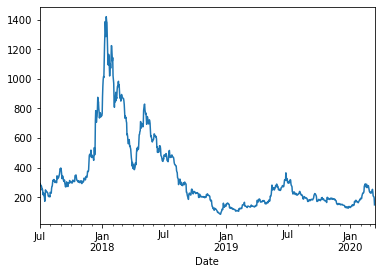

In [406]:
highs.plot()

<AxesSubplot:xlabel='Date'>

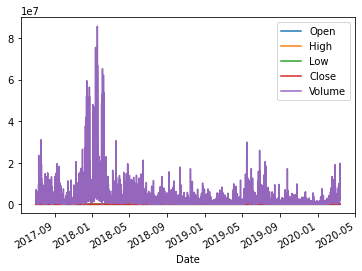

In [408]:
dt.plot()

In [410]:
dt.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [414]:
dt.resample('D').agg({'Close': 'mean', 'High':'max', 'Low':'min','Volume':'sum'})
# functions: mean max min sum by weekly

,Close,High,Low,Volume
Date,,,,
2017-07-01,265.284615,279.99,253.23,2.858402e+07
2017-07-02,269.782500,293.73,255.70,5.226229e+07
2017-07-03,278.882083,285.00,273.07,3.501635e+07
2017-07-04,276.743333,282.83,265.00,3.010991e+07
2017-07-05,265.025833,274.97,252.67,4.315016e+07
...,...,...,...,...
2020-03-09,200.818333,208.65,189.85,9.131404e+07
2020-03-10,201.577500,206.28,195.17,3.727352e+07
2020-03-11,195.910417,202.98,181.00,4.547683e+07
